In [1]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Configuration des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# importation du fichier csv
from google.colab import files
uploaded = files.upload()

Saving donnees_cliniques1.csv to donnees_cliniques1.csv


In [19]:
#chargement des données
df = pd.read_csv('donnees_cliniques1.csv')

#Apercu des premères lignes
print("Aperçu des données :")
display(df.head())
print("Taille du dataset (lignes, colonnes) :", df.shape)

Aperçu des données :


,patient_id,date_consultation,age,prescription_medicament,poids,groupe_sanguin
0,1,28/09/00,45.0,EFFERALGAN,N,A+
1,2,29/09/00,46.0,EFFERALGAN,60,A+
2,3,30/09/00,47.0,EFFERALGAN,NaN,A+
3,4,01/10/00,48.0,EFFERALGAN,50.6,A+
4,5,02/10/00,49.0,Doliprane,50.7,A+


Taille du dataset (lignes, colonnes) : (50, 6)


In [4]:
# Sauvegarde des données brutes
df_brut = df.copy()


In [5]:
print(df.columns.tolist())


['patient_id', 'date_consultation', 'age', 'prescription_medicament', 'poids', 'groupe_sanguin']


In [6]:
#Nettoyer les noms de colonnes (enlever espaces invisibles)
df.columns = df.columns.str.strip()

In [7]:
#Nettoyer les espaces dans les colonnes texte
df['date_consultation'] = df['date_consultation'].astype(str).str.strip()
df['prescription_medicament'] = df['prescription_medicament'].astype(str).str.strip()
df['groupe_sanguin'] = df['groupe_sanguin'].astype(str).str.upper().str.strip()

In [8]:
#Conversion et nettoyage des dates
df['date_consultation'] = pd.to_datetime(df['date_consultation'], format='%d/%m/%y', errors='coerce')

In [9]:
#Nettoyage des ages
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.loc[(df['age'] > 100) | (df['age'] < 0), 'age'] = np.nan  # supposer âge raisonnable

In [13]:
# Nettoyage des poids
df['poids'] = pd.to_numeric(df['poids'], errors='coerce')
df.loc[(df['poids'] > 300) | (df['poids'] < 2), 'poids'] = np.nan  # poids plausible en kg

In [24]:
# Harmonisation des médicaments
def harmonize_medicament(name):
    # Si la valeur est manquante (NaN), on retourne NaN directement
    if pd.isna(name):
        return np.nan

    # On convertit le texte en minuscules pour uniformiser (ex: "Doliprane" → "doliprane")
    # et on enlève les espaces inutiles en début et fin de chaîne (ex: "  Doliprane " → "doliprane")
    name = name.lower().strip()

    # On vérifie si la chaîne contient l’un des mots clés indiquant du paracetamol
    # 'any' renvoie True si au moins un élément dans la liste est trouvé dans la chaîne 'name'
    if any(x in name for x in ['paracetamol', 'paracétamol', 'doliprane', 'efferalgan', 'dafalgan', 'daffalgan']):
        # Si un des mots est trouvé, on standardise la valeur à "paracetamol"
        return 'paracetamol'
    else:
        # Sinon, on laisse la valeur telle quelle (avec sa casse minuscule et espaces nettoyés)
        return name

# On applique cette fonction à toute la colonne 'prescription_medicament' de ton DataFrame
df['prescription_medicament'] = df['prescription_medicament'].apply(harmonize_medicament)

# Autre codage possible pour l'harmonisation des traitements
#df['prescription_medicament'] = df['prescription_medicament'].str.lower().str.strip()
#df['prescription_medicament'] = df['prescription_medicament'].replace(['doliprane','efferalgan','daffalgan','paracetamol','paracétamol'], 'paracetamol')
#df['prescription_medicament'] = df['prescription_medicament'].replace('pracetamol', 'paracetamol')



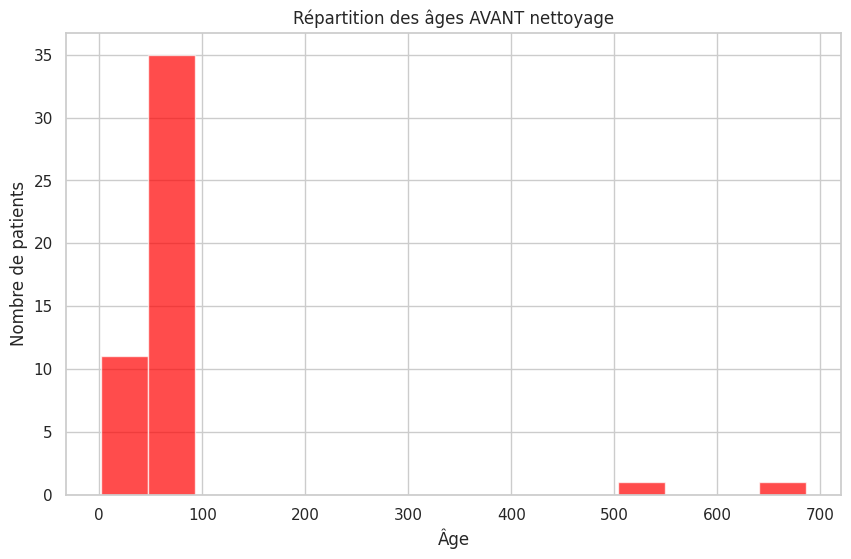

In [14]:
# Visualisation AVANT / APRES

# age avant nettoyage
plt.hist(pd.to_numeric(df_brut['age'], errors='coerce').dropna(), bins=15, color='red', alpha=0.7)
plt.title("Répartition des âges AVANT nettoyage")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()


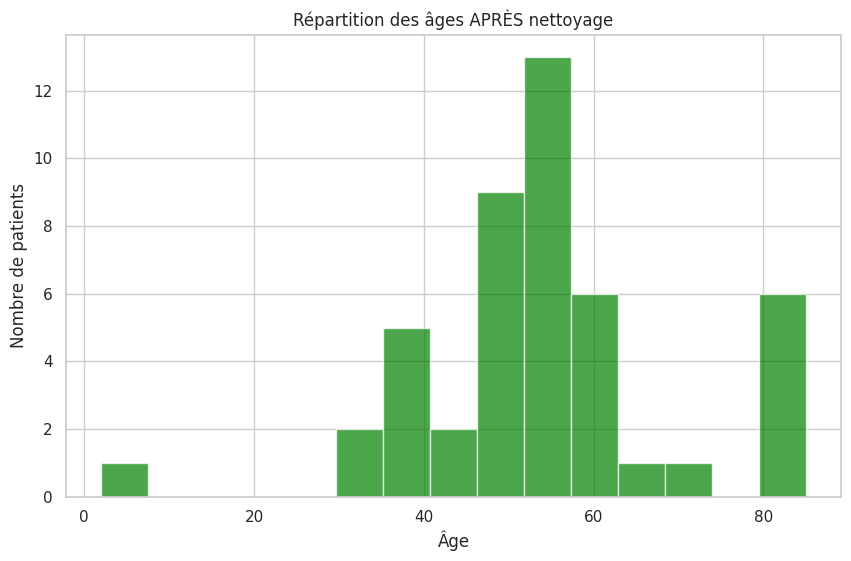

In [15]:
# age APRES nettoyage
plt.hist(df['age'].dropna(), bins=15, color='green', alpha=0.7)
plt.title("Répartition des âges APRÈS nettoyage")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()


Valeurs manquantes APRES nettoyage
patient_id                  0
date_consultation           0
age                         4
prescription_medicament     0
poids                      34
groupe_sanguin              0
dtype: int64


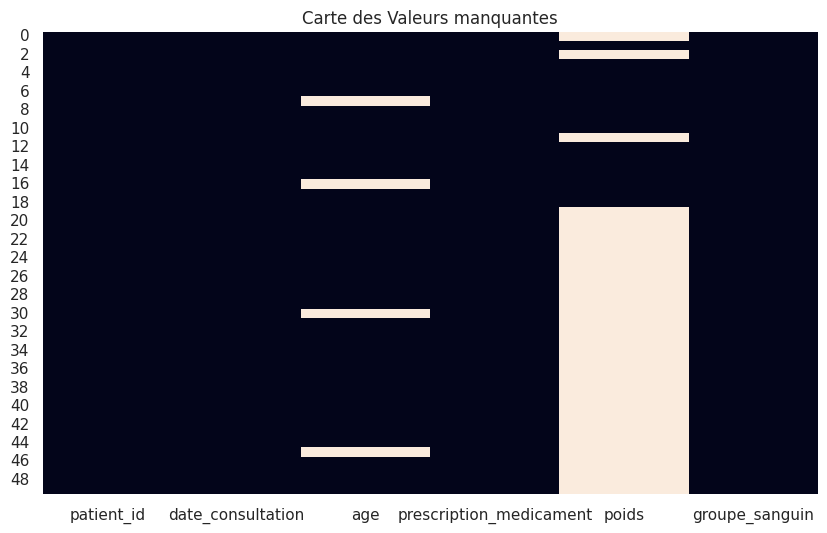

In [16]:
# 1 ère technique pour la visualisation des valeurs manquantes
print("Valeurs manquantes APRES nettoyage")
print(df.isna().sum())

sns.heatmap(df.isna(), cbar=False)
plt.title("Carte des Valeurs manquantes")
plt.show()


Valeurs manquantes par colonne :
patient_id                  0
date_consultation           0
age                         2
prescription_medicament     1
poids                      31
groupe_sanguin              0
dtype: int64


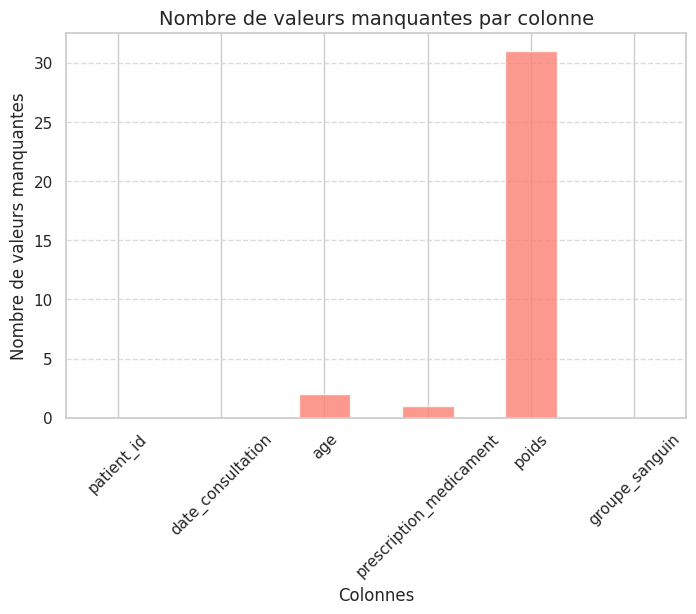

In [22]:
# 2 ème technique pour la visualisation des valeurs manquantes

# Calcul du nombre de valeurs manquantes par colonne
missing_counts = df.isna().sum()

# affichage des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(missing_counts)

# Affichage du barplot
plt.figure(figsize=(8,5))
missing_counts.plot(kind='bar', color='salmon', alpha=0.8)
plt.title("Nombre de valeurs manquantes par colonne", fontsize=14)
plt.xlabel("Colonnes", fontsize=12)
plt.ylabel("Nombre de valeurs manquantes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# comparaison catégories médicaments
print("Médicaments uniques AVANT nettoyage :")
print(df_brut['prescription_medicament'].value_counts())

print("\nMédicaments uniques APRÈS nettoyage :")
print(df['prescription_medicament'].value_counts())

Médicaments uniques AVANT nettoyage :
prescription_medicament
PARACETAMOL    24
DAFFALGAN      10
Daffalgan       5
EFFERALGAN      4
DOLIPRANE       4
Doliprane       1
PRACETAMOL      1
Name: count, dtype: int64

Médicaments uniques APRÈS nettoyage :
prescription_medicament
paracetamol    48
pracetamol      1
Name: count, dtype: int64


In [26]:
# correction faute
df['prescription_medicament'] = df['prescription_medicament'].replace('pracetamol', 'paracetamol')


In [27]:
print("Médicaments uniques APRÈS nettoyage final :")
print(df['prescription_medicament'].value_counts())


Médicaments uniques APRÈS nettoyage final :
prescription_medicament
paracetamol    49
Name: count, dtype: int64


In [28]:
# export du fichier nettoyé
df.to_csv('donnees_cliniques_nettoyees.csv', index=False)
print("succès export")


succès export
